In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

df = pd.read_excel(r"C:\Users\Thomas Wai\OneDrive - AGSE\Desktop\Python\Online Retail\Online Retail.xlsx")

# Show the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
# Create a copy of the original dataset for diagnostics
df_cpy = df.copy()

df_cpy.describe()

#the min unit price is negative so that's illogical so it's typo mistake we need to further investigation for it , also the quantity column the mind is -ve so we need further investigation

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
#identify the columns datatypes and find null content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Transform negative Values to postive for Quantity,UnitPrice and remove duplicates
# Convert negative Quantity and UnitPrice values to positive (for inspection only)
df_cpy[['Quantity', 'UnitPrice']] = df_cpy[['Quantity', 'UnitPrice']].abs()

# Remove duplicate rows
df_cpy = df_cpy.drop_duplicates()

# Display statistical summary to check for outliers and anomalies
summary_stats = df_cpy[['Quantity', 'UnitPrice']].describe()
print("Summary statistics before filtering:")
print(summary_stats)
#then after investigation we've found it's typo for -ve sign so we make absolute value to get postive value from it after that we've found min unit price is zero so we need further investigation for it

Summary statistics before filtering:
            Quantity      UnitPrice
count  536641.000000  536641.000000
mean       11.418315       4.715110
std       219.043814      97.229154
min         1.000000       0.000000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        11.000000       4.130000
max     80995.000000   38970.000000


In [6]:
#Find total orders for products that have Unitprice=0 and CustomerID is Null
zero_price=df_cpy.query('UnitPrice==0') #to filter only unitPirce =0
zero_price_null_cust=zero_price[zero_price['CustomerID'].isna()==True] #to filter only customerID is Null
null_customer_null_price=zero_price_null_cust.groupby('Description',as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo',ascending=False)
null_customer_null_price.rename(columns={'InvoiceNo':'No_of_orders','Description':'Product_name'},inplace=True) # to rename the column inoviceNo to no_of_orders
null_customer_null_price

#after further investigation after group by product_name there's unit price=0 and customer Id=null this likely due to some errors and damages in stores warehouse,and after that we should provide these details for stakeholder.

,Product_name,No_of_orders
238,check,159
3,?,47
248,damages,45
246,damaged,43
264,found,25
...,...,...
156,OOPS ! adjustment,1
158,PACK OF 12 LONDON TISSUES,1
159,PACK OF 6 BIRDY GIFT TAGS,1
160,PARTY METAL SIGN,1


In [7]:
# Filter only where CustomerID Is Not Null
df_cpy=df_cpy[df_cpy['CustomerID'].isna()==False] # we filter for customer ID not null to used for further analysis
df_cpy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
# Replace 'EIRE' with 'Ireland'
df_cpy['Country'] = df_cpy['Country'].replace('EIRE', 'Ireland')

In [9]:
#Create Multiple Columns dervied From InvoiceDate like Month, Year, Quarter....etc
df_cpy['month']=df_cpy.loc[:,'InvoiceDate'].dt.month
df_cpy['year']=df_cpy.loc[:,'InvoiceDate'].dt.year
df_cpy['day']=df_cpy.loc[:,'InvoiceDate'].dt.day
df_cpy['weekday']=df_cpy.loc[:,'InvoiceDate'].dt.weekday # it returns weekdays as 0  which =monday  etc
week_days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Tuesday',6:'Sunday'} # to use in mapping to create weekday column from numerical to actual week names
df_cpy['weekday']=df_cpy['weekday'].map(week_days)
df_cpy['hour']=df_cpy.loc[:,'InvoiceDate'].dt.hour
df_cpy['year_month']=df_cpy.loc[:,'InvoiceDate'].dt.to_period('M') # create column month with the year countinous data
df_cpy['quarter']=df_cpy.loc[:,'InvoiceDate'].dt.to_period('Q') # to create quarter

df_cpy['year_month']=df_cpy.loc[:,'year_month'].dt.to_timestamp() #to change year month column to timestamp data type

df_cpy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,day,weekday,hour,year_month,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4


In [10]:
#Create Column Cancelled From InvoiceNo
df_cpy['InvoiceNo']=df_cpy.loc[:,'InvoiceNo'].astype(str)
df_cpy['cancelled']=df_cpy['InvoiceNo'].str.contains('C') #creation new column as cancelled as if the first character in invoiceNo is C then Cancelled
df_cpy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,day,weekday,hour,year_month,quarter,cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4,False


In [11]:
#Create Total_sales(Revenue) Column
df_cpy['total_sales']=df_cpy.loc[:,"UnitPrice"]*df_cpy.loc[:,"Quantity"] #create column for total_sales
df_cpy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,day,weekday,hour,year_month,quarter,cancelled,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,Wednesday,8,2010-12-01,2010Q4,False,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4,False,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4,False,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4,False,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,9,Friday,12,2011-12-01,2011Q4,False,16.60


In [12]:
#Data Analysis

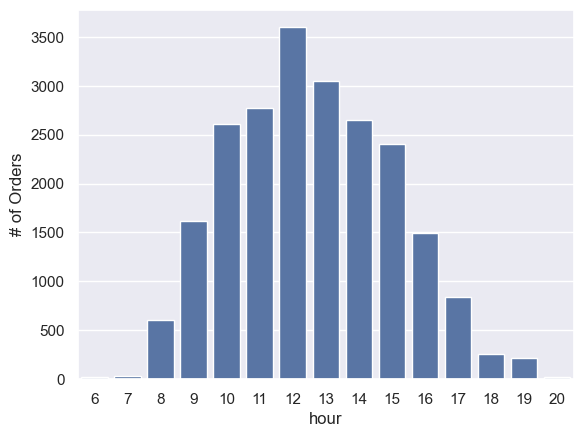

In [13]:
#Total orders per hour
df_order_per_hour=df_cpy.groupby('hour')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo',ascending=False)
sns.barplot(data=df_order_per_hour,x='hour',y='InvoiceNo')
plt.ylabel('# of Orders')
plt.show()
#so with grouping with hour and count unique invoice we've found that's the most ordered time in 10 am to 15 pm especially in 12 pm as the most ordered time slot

In [14]:
#Top customers make orders
total_orders_per_customer=df_cpy.groupby('CustomerID',as_index=False)['InvoiceNo'].nunique().sort_values(by="InvoiceNo",ascending=False)
total_orders_per_customer.rename(columns={'InvoiceNo':'No_of_orders'},inplace=True)
total_orders_per_customer.head(10)

,CustomerID,No_of_orders
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
2192,15311.0,118
487,12971.0,89
1615,14527.0,86
803,13408.0,81
1703,14646.0,77


In [15]:
#Top customers make revenue
df_cpy.groupby('CustomerID',as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False).head(10)
#also i reccommend to create loyality program for the top customer to recurring purchasing from us like the customer 14911.0 who ordered 248 times also for the most buyers from our stores like customer 16446.0

,CustomerID,total_sales
3033,16446.0,336942.10
1703,14646.0,280923.02
4233,18102.0,262876.11
3758,17450.0,201459.41
1895,14911.0,154963.61
0,12346.0,154367.20
55,12415.0,126103.61
1345,14156.0,121205.57
2722,16029.0,108532.99
3801,17511.0,93999.38


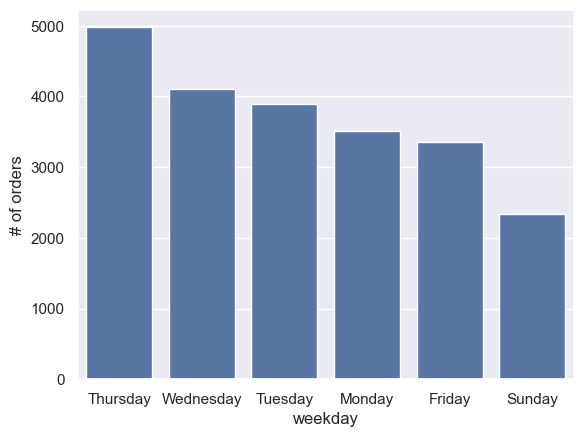

In [16]:
#Number Of Orders per Weekday
df_unique_orders_by_weekday=df_cpy.groupby('weekday')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo',ascending=False) # grouping the data by weekday then count the unique ordres
sns.barplot(data=df_unique_orders_by_weekday,x='weekday',y='InvoiceNo')
plt.ylabel('# of orders')
plt.show()

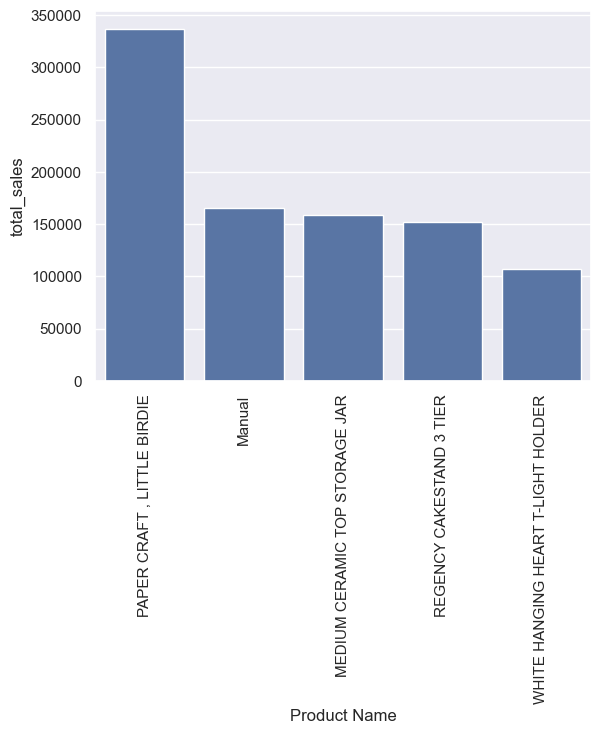

In [17]:
#Top products make revenue
#by this barplot we should manage schedule and capacity for warehouse team and all involved employees to make sure no order is delayed by staff shortage or due to high order levels to improve customer experience.
df_products=df_cpy.groupby(['Description'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head(5) ## top 5 selling products
sns.barplot(data=df_products,x='Description',y='total_sales')
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.show()

In [18]:
#Top selling Products by Total Quantity
df_products=df_cpy.groupby(['Description']).agg({'Quantity':'sum','InvoiceNo':'count'}).reset_index().sort_values(by='Quantity',ascending=False) ## top 10 selling products
df_products.rename(columns={'InvoiceNo':'No_of_orders'},inplace=True)
df_products.head(10)

,Description,Quantity,No_of_orders
2329,"PAPER CRAFT , LITTLE BIRDIE",161990,2
2002,MEDIUM CERAMIC TOP STORAGE JAR,152410,208
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55519,477
1771,JUMBO BAG RED RETROSPOT,47193,1659
3716,WHITE HANGING HEART T-LIGHT HOLDER,39284,2058
217,ASSORTED COLOUR BIRD ORNAMENT,35311,1405
2279,PACK OF 72 RETROSPOT CAKE CASES,33954,1062
2612,POPCORN HOLDER,31346,689
2669,RABBIT NIGHT LIGHT,27261,838
2057,MINI PAINT SET VINTAGE,26272,335


In [19]:
#Trends of total sales during the year
sales_per_year=df_cpy.groupby('year_month')['total_sales'].sum().reset_index()  #total sales per year
sns.lineplot(data=sales_per_year,x='year_month',y='total_sales')
plt.title("total_sales during the year")

Text(0.5, 1.0, 'total_sales during the year')

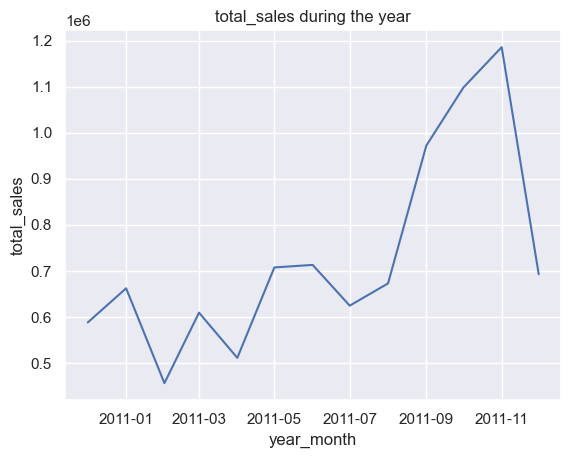

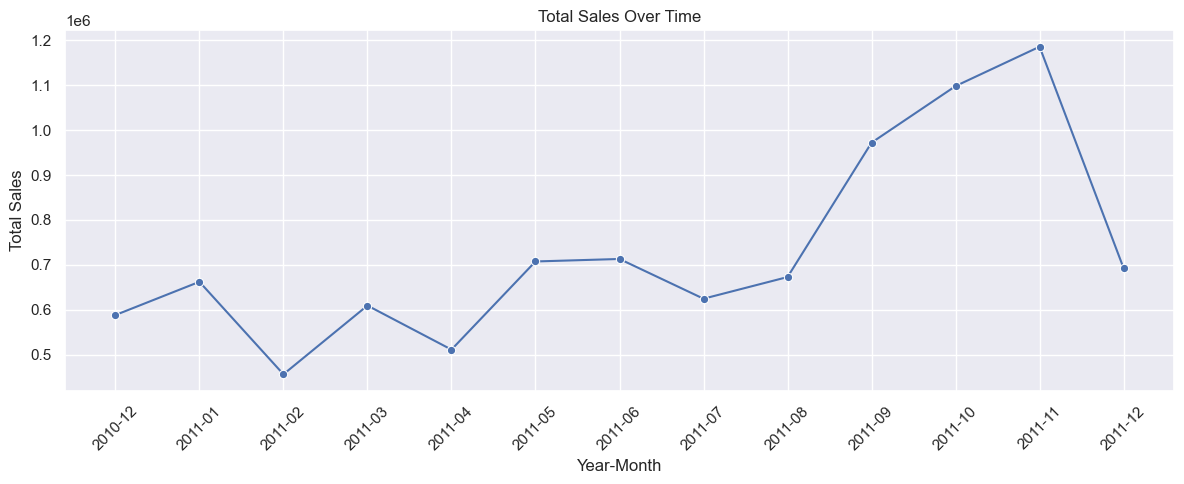

In [20]:
# Calculate and display the mean and median of Quantity in cleaned data
df_cpy['InvoiceDate'] = pd.to_datetime(df_cpy['InvoiceDate'])
df_cpy['year_month'] = df_cpy['InvoiceDate'].dt.to_period('M').astype(str)
df_cpy['total_sales'] = df_cpy['Quantity'] * df_cpy['UnitPrice']

# Group and plot
graph_data = df_cpy.groupby('year_month')['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=graph_data, x='year_month', y='total_sales', marker='o')
plt.title("Total Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#There is an increase in sales during the last months of the year, from October to December, and steep decrease from January to February.

In [21]:
#Total Sales Per Quarter
top_quarter=df_cpy.groupby('quarter')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False) #we have to remove 2010Q4 as it's only has one month
top_quarter['quarter']=top_quarter['quarter'].astype(str) #change to string to use this column to filter with
top_quarter.query('quarter!="2010Q4"') # to filter all columns except 2010Q4

,quarter,total_sales
4,2011Q4,2976416.120
3,2011Q3,2269861.643
2,2011Q2,1932454.201
1,2011Q1,1728693.800


In [22]:
#Total sales Percent per Country
top_country=df_cpy.groupby('Country')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head(5) #top 5 country sales
top_country['sales_percent']=(top_country['total_sales']/df_cpy['total_sales'].sum())*100 #to calculate Total sales share per country
top_country['sales_percent']=top_country['sales_percent'].round(2).astype(str)+'%' # to add % and round the percent to 2 decimals in column sales_percent
top_country

#as we can see the most of sales comes from UK as 82% of total sales

,Country,total_sales,sales_percent
35,United Kingdom,7822893.134,82.38%
23,Netherlands,286231.140,3.01%
16,Ireland,280523.140,2.95%
13,Germany,235847.330,2.48%
12,France,221242.570,2.33%


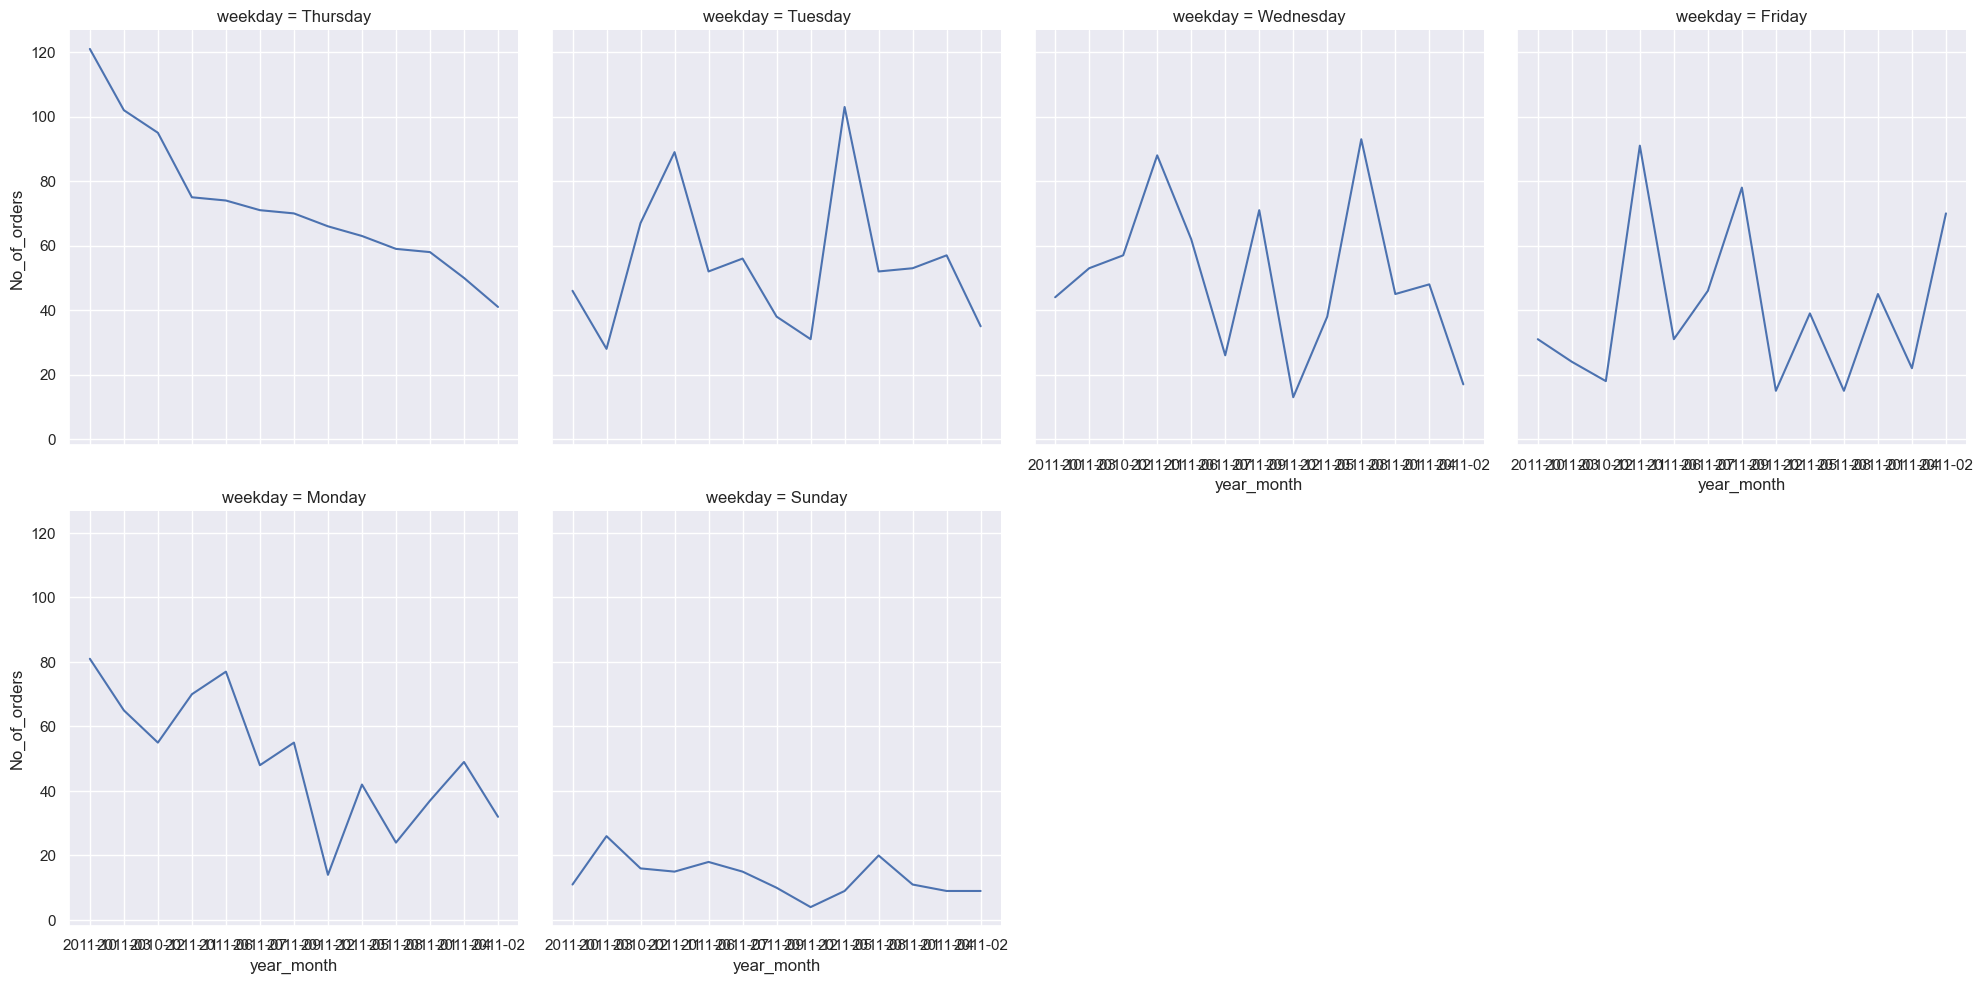

In [23]:
#Trends of Cancellation during the year per weekday
cancelled_orderes=df_cpy.groupby(['year_month','cancelled','weekday'],as_index=False)['InvoiceNo'].nunique().sort_values(by='InvoiceNo',ascending=False).query('cancelled==True') # this to calculate the number of orders that's has been canceled during year and every day
cancelled_orderes
figure1=sns.relplot(data=cancelled_orderes,x='year_month',y='InvoiceNo',col='weekday',kind='line',col_wrap=4) #we plot the trend of cancellation during the year for every day to find the most days that has high volume of cancellation
for fig in figure1.axes.flat:
  fig.set_ylabel('No_of_orders') #to rename y axis
plt.show()

In [24]:
#cancellation orders per customer
customer_cancelled=df_cpy.groupby(['CustomerID','cancelled'],as_index=False)["InvoiceNo"].nunique().sort_values(by='InvoiceNo',ascending=False)
customer_cancelled.rename(columns={"InvoiceNo":"No_of_orders"},inplace=True)
customer_cancelled.query('cancelled==True').head(10)
#there's some customers who facing many cancellation

,CustomerID,cancelled,No_of_orders
2617,14911.0,True,47
5497,17841.0,True,45
2315,14606.0,True,35
2239,14527.0,True,31
3026,15311.0,True,27
4124,16422.0,True,24
796,13089.0,True,21
137,12471.0,True,19
1120,13408.0,True,19
1254,13534.0,True,18


In [ ]:
#Insights and Recommendations
#🔍 Data Quality & System Integrity
#1. Investigate Null Customers & Zero-Priced Items
#We recommend initiating discussions with relevant teams regarding transactions with missing CustomerID and UnitPrice = 0.
#Upon further analysis, many of these entries are associated with product damages or store errors—especially when both the customer ID is null and unit price is zero. These findings suggest internal operational or inventory handling issues that need to be validated and documented.

#🕒 Operational Efficiency
#2. Optimize Resources During Peak Hours and Days
#Analysis reveals that order volumes significantly increase between 10 AM and 3 PM, particularly on Thursdays, and peak during the fourth quarter (October–December).
#To maintain service levels and avoid customer dissatisfaction, we recommend allocating additional resources (staff, inventory, logistics) during these high-traffic periods.

#🎁 Customer Retention Strategy
#3. Introduce Loyalty Programs for High-Value Customers
#Our top customers—those with the highest purchase frequency and revenue contribution—represent a key segment for growth.
#We suggest implementing a tiered loyalty program to reward these customers and encourage repeat purchases, improving long-term retention.

#📦 Product-Level Strategy
#4. Adjust Supply and Promotions Based on Product Demand
#High-demand products should be prioritized in procurement and kept in stock consistently.
#Meanwhile, low-demand products should be supported with targeted marketing, bundle offers, or discount campaigns to reduce holding costs and stimulate sales.

#❌ Order Cancellations Review
#5. Investigate Cancellation Trends
#We observed a noticeable spike in cancellations on Thursdays, and some customers experienced multiple cancellations.
#This warrants a deeper operational review to understand root causes—whether it's related to staffing shortages, system issues, or inventory mismatches.
#Resolving these issues is crucial for protecting revenue and maintaining trust.